In [1]:
import numpy as np
from numpy import array,transpose,dot,shape
import matplotlib.pyplot as plt
%matplotlib inline 
from numpy.linalg import inv

In [2]:
x=array([[1,1,1,1,1,1,1,1,1,1,1,1],[1,2,3,4,5,6,7,8,9,10,11,12]])
x=transpose(x)
# y as a price in 1000 usd
y=array([[2,2,2,2.3,2.6,2.8,3,2.8,2.6,2.3,2,2]])
y=transpose(y)
z=array([[1,2,3,4,5,6,7,8,9,10,11,12]])
z=transpose(z)

In [3]:
print x,'\n',y,'\n',z,'\n'

[[ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]] 
[[ 2. ]
 [ 2. ]
 [ 2. ]
 [ 2.3]
 [ 2.6]
 [ 2.8]
 [ 3. ]
 [ 2.8]
 [ 2.6]
 [ 2.3]
 [ 2. ]
 [ 2. ]] 
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]] 



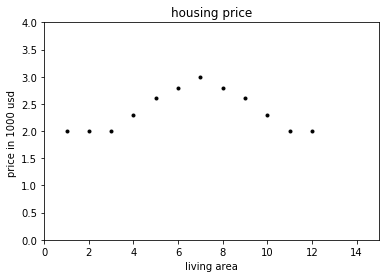

In [4]:
plt.figure()
plt.title("housing price")
plt.xlabel("living area")
plt.ylabel("price in 1000 usd ")
plt.plot(z,y,'k.')
plt.axis([0,15,0,4])
plt.show()

In [5]:
def weight(z,target):
    t=z-target
    # 1.2 considered bandwidth value
    return np.exp((-(t * t)/(2 * 0.1 * 0.1)))


def gradient_descent(x,y,z,target):
    # m is number of trainning set
    # n no fo features
    n=shape(x)[1]
    m=shape(x)[0] # also shape(y)[0]
    t=np.ones((n,1)) # matrix like [[1],[1]]
    for i in range(0,4000):
        s=(dot(x,t))-y
        #for locally weighted regression
        wt=weight(z,target)
        s=s * wt
        l=dot(transpose(x),s)
        t=t - ((0.01 * l)/(m))
    
    return t

theta=gradient_descent(x,y,z,6)

def prediction(x):
    return theta[0] + (theta[1]*x)



print theta

[[ 0.88648649]
 [ 0.31891892]]


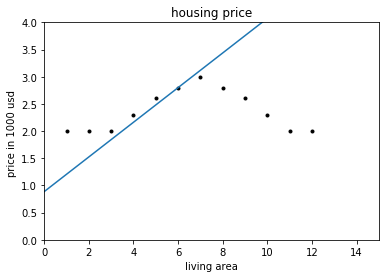

In [6]:
plt.figure()
plt.title("housing price")
plt.xlabel("living area")
plt.ylabel("price in 1000 usd ")
plt.plot(z,y,'k.')
xx=np.linspace(0,15)
plt.axis([0,15,0,4])
yy=prediction(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)
plt.show();


In [7]:
def parameter(x,y):
    l=dot(inv(dot(transpose(x),x)),dot(transpose(x),y))
    return l

l=parameter(x,y)

def predict(x):
    return l[0] + (l[1]*x)

print l

[[ 2.26666667]
 [ 0.01538462]]


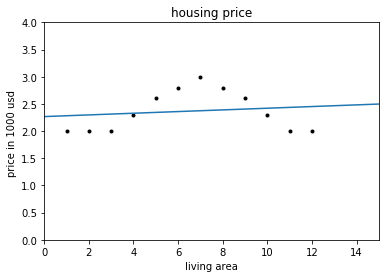

In [8]:
plt.figure()
plt.title("housing price")
plt.xlabel("living area")
plt.ylabel("price in 1000 usd ")
plt.plot(z,y,'k.')
xx=np.linspace(0,15)
plt.axis([0,15,0,4])
yy=predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)
plt.show();
